In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = sns.load_dataset("mpg")

X_train, y_train = df[~df["horsepower"].isna()][["displacement", "acceleration"]], df[~df["horsepower"].isna()]["horsepower"]
X_pred = df[df["horsepower"].isna()][["displacement", "acceleration"]]

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_pred)
y_pred = np.round(y_pred)
df.loc[X_pred.index, "horsepower"] = y_pred
df = pd.get_dummies(df.drop("name", axis = 1), columns = ["origin"])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1


In [3]:
X, y = df.drop(["mpg"], axis = 1).values, df["mpg"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

In [4]:
scaler = StandardScaler()
#scaler = MinMaxScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_val = scaler.transform(X_val)
scaled_X_test = scaler.transform(X_test)

In [21]:
from evolutionary_algos import VectorizedEvoRegressor, EvoRegressor

In [34]:
#regressor = EvoRegressor(n = 100, hidden_layers = [25], activation = "relu", random_state = 42)
regressor = VectorizedEvoRegressor(n = 100, hidden_layers = [8], activation = "relu", random_state = 42)


regressor.fit(scaled_X_train, y_train, epochs = 5000, validation_data = (scaled_X_val, y_val), verbose = 1)

Epoch 0 - loss: 9.786355915585393 - val_loss: 10.073066598364559
Epoch 79 - loss: 6.896819286731809 - val_loss: 7.82040597438868
Epoch 139 - loss: 5.971066528333756 - val_loss: 6.126211713746786
Epoch 193 - loss: 5.92733187053634 - val_loss: 6.37920083795224
Epoch 211 - loss: 5.736791224980283 - val_loss: 5.448856821370819
Epoch 212 - loss: 4.540560907251036 - val_loss: 3.920663753961591
Epoch 245 - loss: 4.271835260413706 - val_loss: 3.8296557746072244
Epoch 257 - loss: 3.78498397672879 - val_loss: 3.878079810163247
Epoch 279 - loss: 3.708610000153032 - val_loss: 4.007425923904147
Epoch 283 - loss: 3.4977912254594115 - val_loss: 2.9835964158709074
Epoch 307 - loss: 3.375625878151179 - val_loss: 3.3582423272565984
Epoch 333 - loss: 3.2566157490440566 - val_loss: 2.4165451382011147
Epoch 335 - loss: 3.0914073645307183 - val_loss: 3.1951774806857953
Epoch 358 - loss: 3.0521721536591877 - val_loss: 2.8220002101937354
Epoch 359 - loss: 2.9550301880457712 - val_loss: 2.4963144061259896
Epoc

In [35]:
y_pred = regressor.predict(scaled_X_test)

In [36]:
mean_absolute_error(y_test, y_pred)

1.6348857489085493

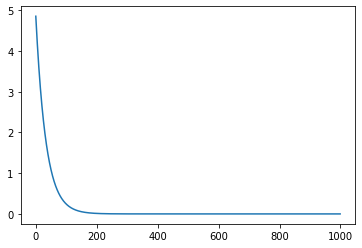

In [9]:
y = []
xrange = 1000

for x in range(1, xrange + 1):
    y.append(5 * 1 / math.exp(x / (xrange / (10 * math.log10(xrange)))))

plt.plot(list(range(xrange)), y)

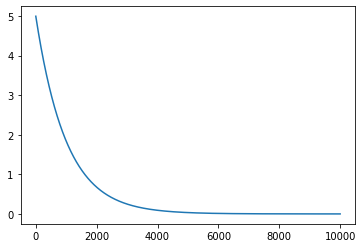

In [10]:
y = []
xrange = 10000

for x in range(1, xrange + 1):
    y.append(5 * 1 / math.exp(x / (xrange / 10)))

plt.plot(list(range(xrange)), y)